(150, 150, 3)

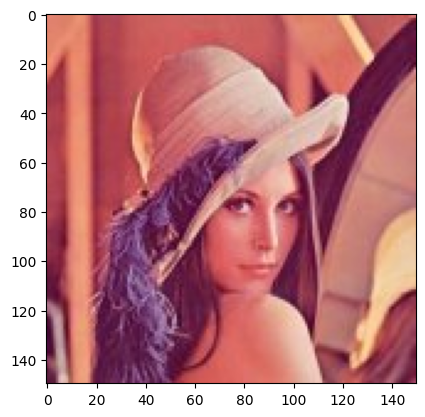

In [13]:

#! thêm các thư viện hỗ trợ 
import time
from PIL import Image
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from PIL import Image # Open & save 
import math
#! chương trình hiện ảnh gốc 
img = cv2.imread('Lenna.jpg')
#! sử dụng cvtColor để chuyển từ BGR sang RGB lại bằng tham COLOR_BGR2RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
#! thông tin của bức ảnh trên, w x h x c 
img.shape


<h1>Color transformations</h1>

<h3>Linear mapping</h3>

Runtime is 0.0010135173797607422 seconds.


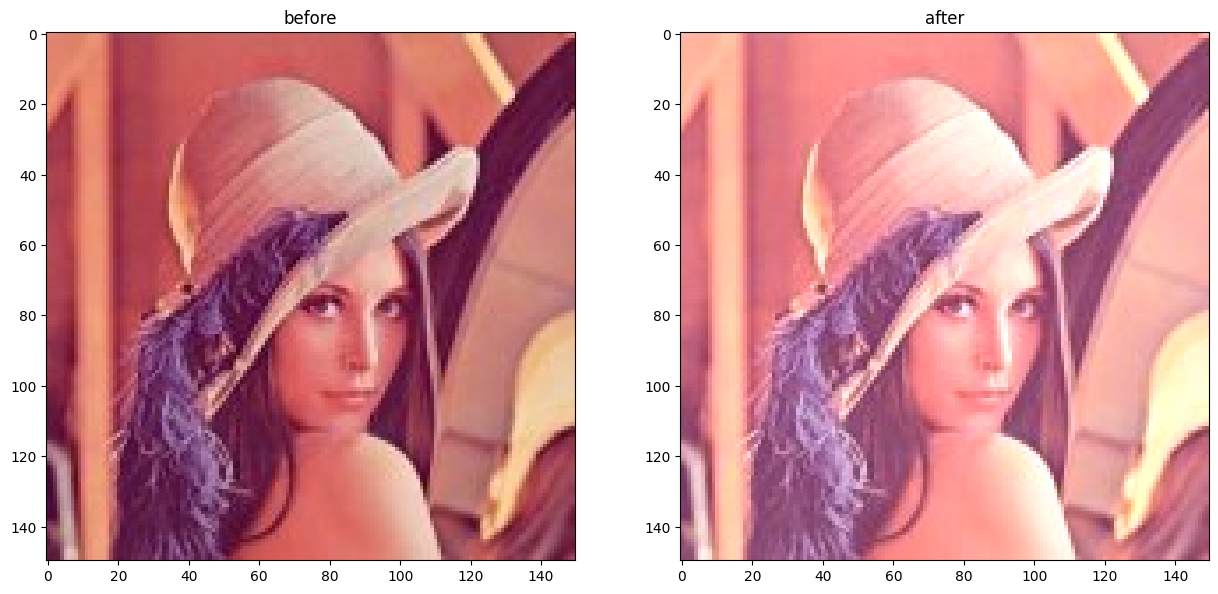

In [30]:

 #! g(x,y) = f(x,y)+b 
def linear1(image, b):
    arrayImage = np.array(img)
    newImage = arrayImage + float(b) 
    newImage = np.clip(newImage, 0, 255)# giới hạn miền giá trị 0-255
    return newImage.astype(np.uint8) # chuyển từ float thành int

#! mở ảnh
img = Image.open("Lenna.jpg")

#! show ảnh gốc 
fig = plt.figure(figsize=(15,12))
ax1,ax2 = fig.subplots(1,2)
ax1.set_title("before")
ax1.imshow(img)

#! starting time
start = time.time()
#! gọi hàm biến đổi 
img = linear1(img,50)
#! end time
end = time.time()

#! total time taken
print(f"Runtime is {end - start} seconds.")
#! show ảnh sau biến đổi
ax2.set_title("after")
ax2.imshow(img)



Runtime is 0.000985860824584961 seconds.


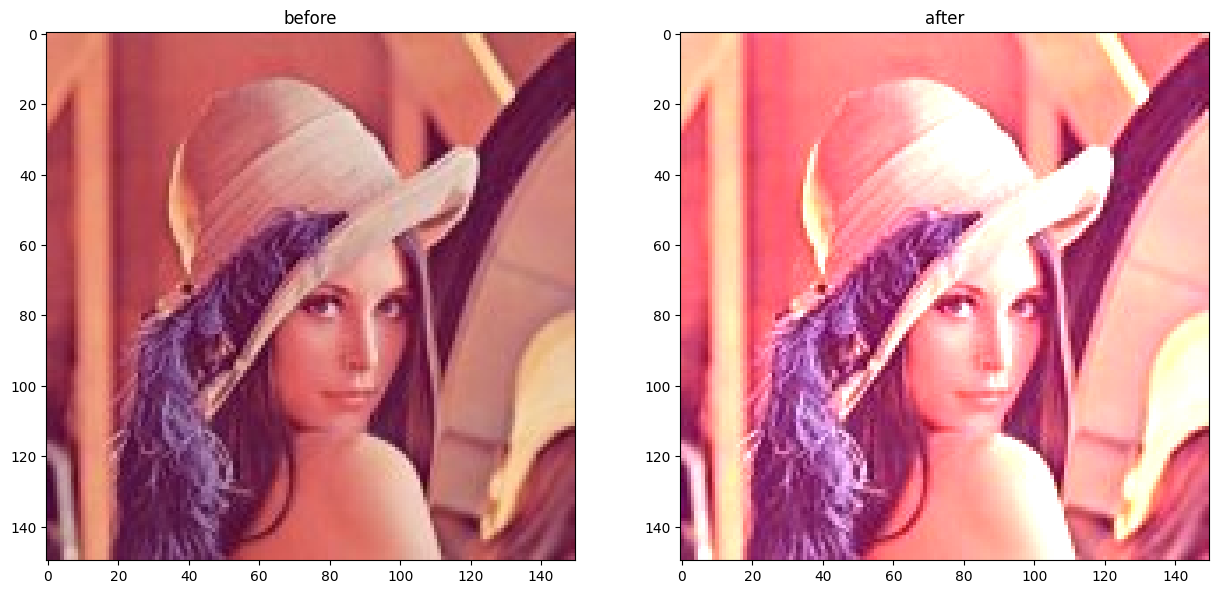

In [28]:

 #! g(x,y) = a.f(x,y) 
def linear2(image, a):
    arrayImage = np.array(img)
    newImage = arrayImage*float(a)  
    newImage = np.clip(newImage, 0, 255) #giới hạn miền giá trị 
    return newImage.astype(np.uint8) #chuyển giá trị float thành int

#! mở ảnh
img = Image.open("Lenna.jpg")

#! show ảnh gốc 
fig = plt.figure(figsize=(15,12))
ax1,ax2 = fig.subplots(1,2)
ax1.set_title("before")
ax1.imshow(img)

#! starting time
start = time.time()
#! gọi hàm biến đổi 
img = linear2(img,1.5)
#! end time
end = time.time()

#! total time taken
print(f"Runtime is {end - start} seconds.")
#! show ảnh sau biến đổi
ax2.set_title("after")
ax2.imshow(img)

Runtime is 0.0010280609130859375 seconds.


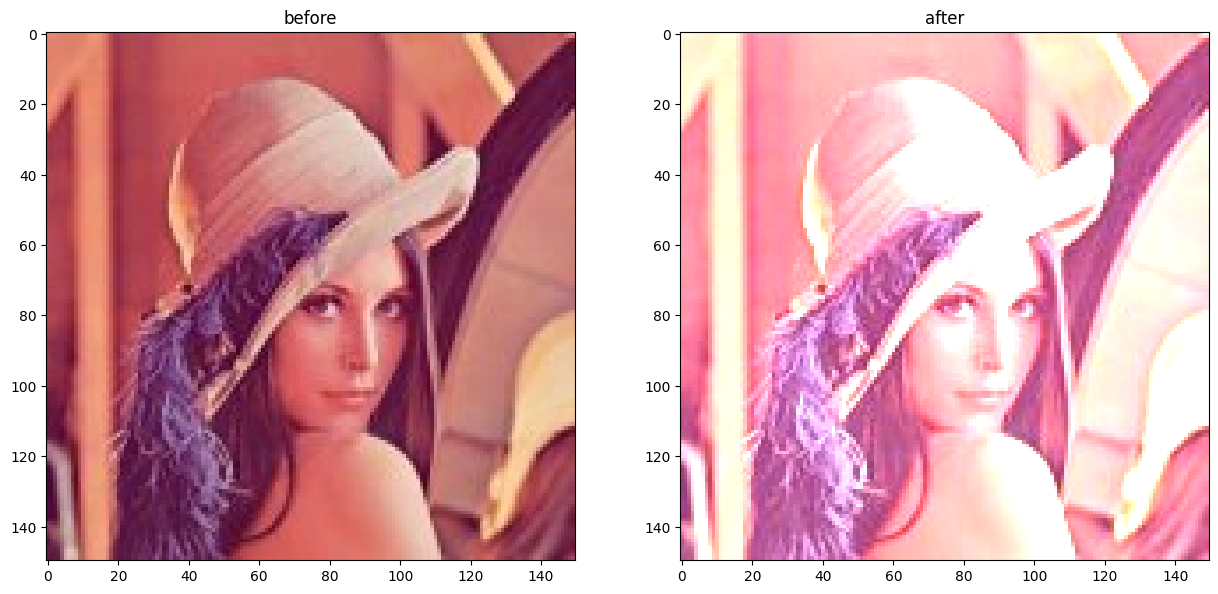

In [29]:


 #! g(x,y) = a.f(x,y) + b
def linear3(image, a,b):
    arrayImage = np.array(img)
    newImage = arrayImage*float(a)+float(b)  
    newImage = np.clip(newImage, 0, 255) # giới hạn miền giá trị
    return newImage.astype(np.uint8) #chuyển giá trị float thành int
    
#! mở ảnh
img = Image.open("Lenna.jpg")

#! show ảnh gốc 
fig = plt.figure(figsize=(15,12))
ax1,ax2 = fig.subplots(1,2)
ax1.set_title("before")
ax1.imshow(img)

#! starting time
start = time.time()
#! gọi hàm biến đổi 
img = linear3(img,1.5,50)
#! end time
end = time.time()

#! total time taken
print(f"Runtime is {end - start} seconds.")
#! show ảnh sau biến đổi
ax2.set_title("after")
ax2.imshow(img)

<h3>Non-linear mapping</h3>

Runtime is 0.003529787063598633 seconds.


C:\Users\admin\AppData\Local\Temp\ipykernel_11880\3193332291.py:4: RuntimeWarning: divide by zero encountered in log
  newImage = np.log(arrayImage)*float(c)


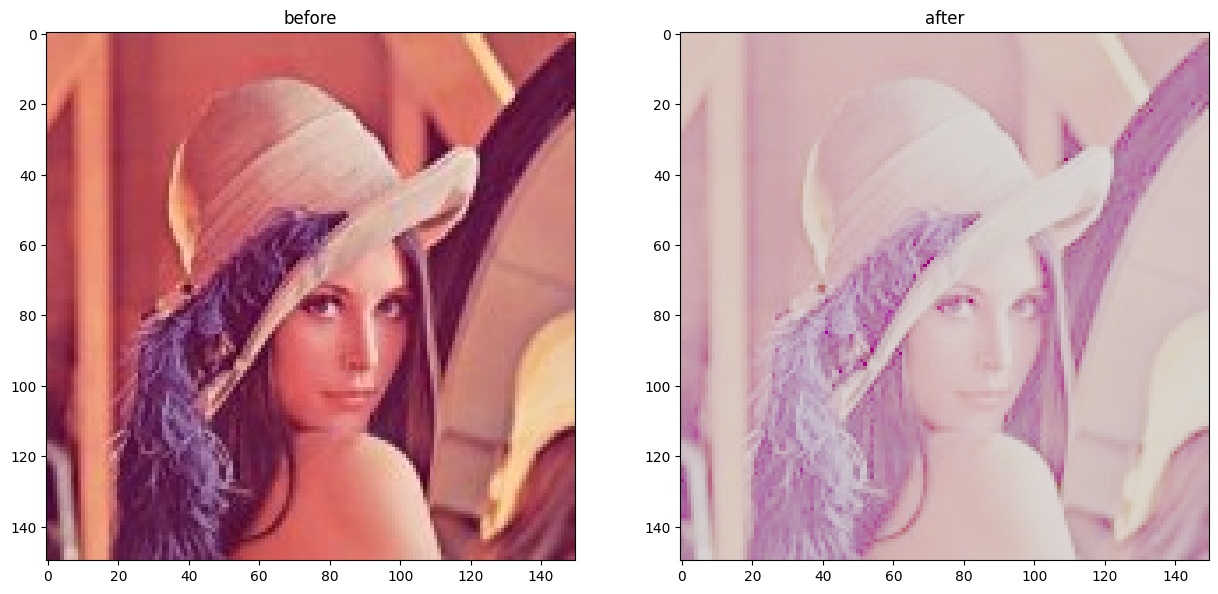

In [31]:

 #! g(x,y) = c.logf(x,y)
def NonLinear1(image, c):
    arrayImage = np.array(img)
    newImage = np.log(arrayImage)*float(c)  
    newImage = np.clip(newImage, 0, 255) # giới hạn miền giá trị
    return newImage.astype(np.uint8) # chuyển giá trị float thành int
    
#! mở ảnh
img = Image.open("Lenna.jpg")

#! show ảnh gốc 
fig = plt.figure(figsize=(15,12))
ax1,ax2 = fig.subplots(1,2)
ax1.set_title("before")
ax1.imshow(img)

#! starting time
start = time.time()
#! gọi hàm biến đổi 
img = NonLinear1(img,40)
#! end time
end = time.time()

#! total time taken
print(f"Runtime is {end - start} seconds.")
#! show ảnh sau biến đổi
ax2.set_title("after")
ax2.imshow(img)

Runtime is 0.0009989738464355469 seconds.


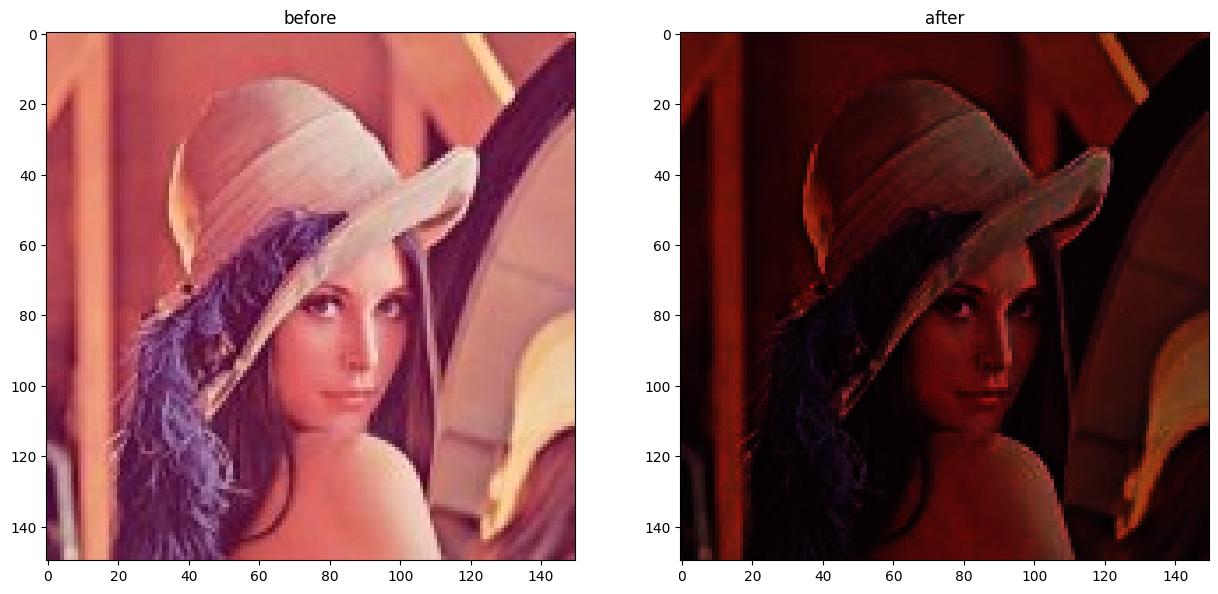

In [33]:


 #! g(x,y) = e^f(x,y)
def NonLinear2(image):
    arrayImage = np.array(img)
    #!chia cho 50 để hạn chế số mũ quá lớn
    newImage = np.exp(arrayImage/float(50))   
    newImage = np.clip(newImage, 0, 255) # giới hạn miền giá trị
    return newImage.astype(np.uint8) # chuyển giá trị từ float thành int
    
#! mở ảnh
img = Image.open("Lenna.jpg")

#! show ảnh gốc 
fig = plt.figure(figsize=(15,12))
ax1,ax2 = fig.subplots(1,2)
ax1.set_title("before")
ax1.imshow(img)

#! starting time
start = time.time()
#! gọi hàm biến đổi 
img = NonLinear2(img)
#! end time
end = time.time()

#! total time taken
print(f"Runtime is {end - start} seconds.")
#! show ảnh sau biến đổi
ax2.set_title("after")
ax2.imshow(img)

<h3>Historgram</h3>

Runtime is 0.01802825927734375 seconds.


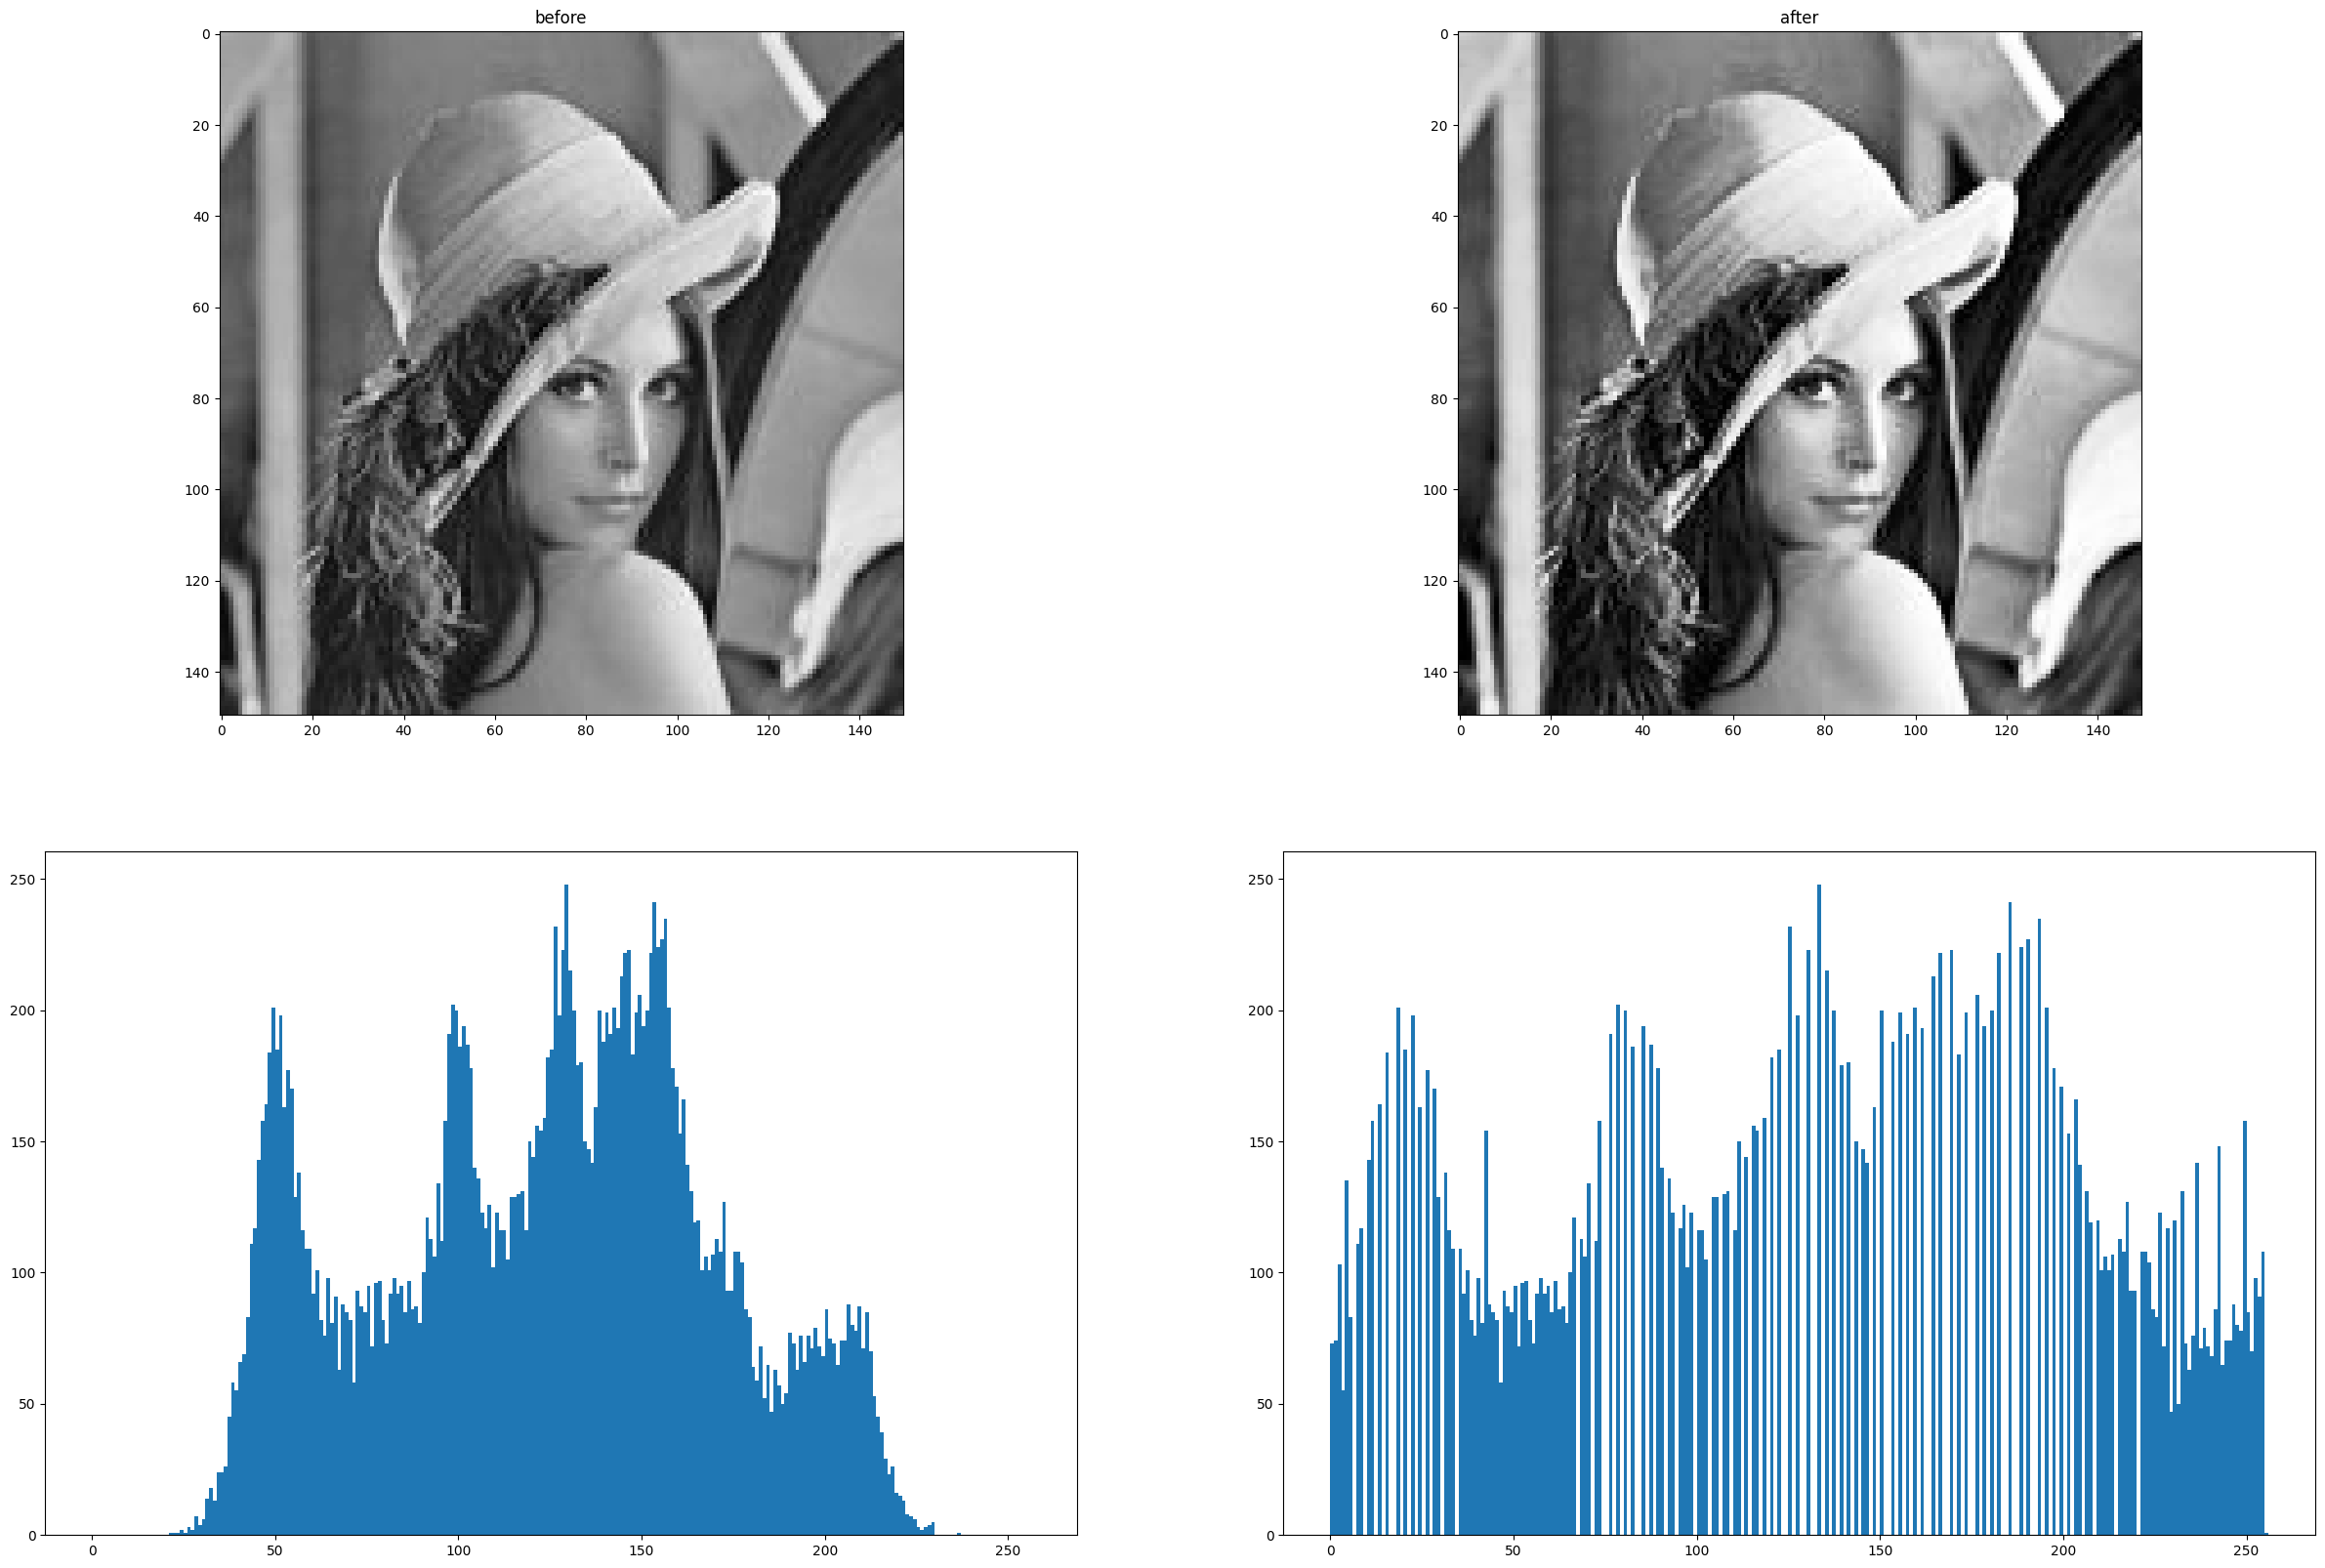

In [37]:

#!hàm chuyển ảnh xám
def GetGrayImg(src):
    img =  cv2.imread(src,cv2.IMREAD_COLOR)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray_img

#! cân bằng Histogram
def Histogram(img):
    count=[]#! mảng chứa số lần xuất hiện của độ xám
    H=[]#! mảng chứa giá trị độ xám sau khi cân bằng
    #!N.M
    sum = len(img)*len(img[0])
    #!khởi tạo giá trị các phần tử của mảng H và R
    for i in range(256):
        count.append(0)
        H.append(i)
    for i in range(len(img)):
        for j in range(len(img[i])):
            a = img[i][j]
            count[a]+=1
    #! bắt đầu quá trình cân bằng
    for i in range(len(H)):
        temp = i
        if(i == 0):
            H[i]=math.floor((count[i]*255)/sum)
        if(count[temp] != 0):
            sum_pixels_temp = 0
            for j in range(temp+1):
                sum_pixels_temp+=count[j]
            H[i]=math.floor((sum_pixels_temp*255)/sum)

    #! thay thế giá trị độ xám cũ bằng giá trị đã cân bằng trong mảng Histogram
    for i in range(len(img)):
        for j in range(len(img[i])):
            a=img[i][j]
            img[i][j]=H[a]

fig, axes = plt.subplots(2,2, figsize=(30,20))
#! Show ảnh xám gốc
img = GetGrayImg("Lenna.jpg")
axes[0, 0].set_title('before')
axes[0, 0].imshow(img,cmap='gray')
axes[1, 0].hist(img.flatten(), 256, [0,256])  

#! starting time
start = time.time()
#! gọi hàm biến đổi
Histogram(img)
#! end time
end = time.time()

#! total time taken
print(f"Runtime is {end - start} seconds.")
#! show ảnh và Histogram sau cân bằng 
axes[0, 1].set_title('after')
axes[0, 1].imshow(img,cmap='gray')
axes[1, 1].hist(img.flatten(), 256, [0,256])
